In [1]:
##Machine Learning -Regressor Algorthm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,r2_score
import joblib
import re

In [3]:
##Dataset

In [4]:
df=pd.read_csv('C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/car details v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [5]:
##Data Preprocessing

In [6]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [7]:
df.tail()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0
2058,Mahindra,Bolero Power Plus ZLX [2016-2019],670000,2017,72000,Diesel,Manual,Guwahati,White,First,Individual,1493 cc,70 bhp @ 3600 rpm,195 Nm @ 1400 rpm,RWD,3995.0,1745.0,1880.0,7.0,NaN


In [8]:
df.describe

<bound method NDFrame.describe of                Make                                  Model    Price  Year  \
0             Honda                    Amaze 1.2 VX i-VTEC   505000  2017   
1     Maruti Suzuki                        Swift DZire VDI   450000  2014   
2           Hyundai                   i10 Magna 1.2 Kappa2   220000  2011   
3            Toyota                               Glanza G   799000  2019   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]  1950000  2018   
...             ...                                    ...      ...   ...   
2054       Mahindra                  XUV500 W8 [2015-2017]   850000  2016   
2055        Hyundai                           Eon D-Lite +   275000  2014   
2056           Ford            Figo Duratec Petrol ZXI 1.2   240000  2013   
2057            BMW  5-Series 520d Luxury Line [2017-2019]  4290000  2018   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]   670000  2017   

      Kilometer Fuel Type Transmission   

In [9]:
df.shape

(2059, 20)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
Label=LabelEncoder()

In [12]:
df['Make']=Label.fit_transform(df['Make'])
df['Model']=Label.fit_transform(df['Model'])
df['Fuel Type']=Label.fit_transform(df['Fuel Type'])
df['Transmission']=Label.fit_transform(df['Transmission'])
df['Location']=Label.fit_transform(df['Location'])
df['Color']=Label.fit_transform(df['Color'])
df['Owner']=Label.fit_transform(df['Owner'])
df['Seller Type']=Label.fit_transform(df['Seller Type'])
df['Drivetrain']=Label.fit_transform(df['Drivetrain'])

In [13]:
def get_value(val):
    if val != val:
        return val
    return float(re.split(' |@', val)[0])
df['Engine'] = df['Engine'].apply(get_value)
df['Max Power'] = df['Max Power'].apply(get_value)
df['Max Torque'] = df['Max Torque'].apply(get_value)

In [14]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,106,505000,2017,87150,6,1,56,7,1,1,1198.0,87.0,109.0000,1,3990.0,1680.0,1505.0,5.0,35.0
1,19,802,450000,2014,75000,2,1,40,15,3,2,1248.0,74.0,190.0000,1,3995.0,1695.0,1555.0,5.0,42.0
2,8,1030,220000,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1,3585.0,1595.0,1550.0,5.0,35.0
3,30,492,799000,2019,37500,6,1,41,13,1,2,1197.0,82.0,113.0000,1,3995.0,1745.0,1510.0,5.0,37.0
4,30,548,1950000,2018,69000,2,1,45,7,1,2,2393.0,148.0,343.0000,2,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,999,850000,2016,90300,2,1,67,15,1,2,2179.0,138.0,330.0000,1,4585.0,1890.0,1785.0,7.0,70.0
2055,8,414,275000,2014,83000,6,1,1,15,3,2,814.0,55.0,75.0000,1,3495.0,1550.0,1500.0,5.0,32.0
2056,6,455,240000,2013,73000,6,1,68,14,1,2,1196.0,70.0,102.0000,1,3795.0,1680.0,1427.0,5.0,45.0
2057,1,13,4290000,2018,60474,2,0,12,15,1,2,1995.0,188.0,400.0000,2,4936.0,1868.0,1479.0,5.0,65.0


In [15]:
##To find the Missing Values

In [16]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain              0
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [17]:
df.drop(columns=['Length','Width','Height','Seating Capacity','Fuel Tank Capacity'],inplace=True)

In [18]:
df.isnull().sum()

Make             0
Model            0
Price            0
Year             0
Kilometer        0
Fuel Type        0
Transmission     0
Location         0
Color            0
Owner            0
Seller Type      0
Engine          80
Max Power       80
Max Torque      80
Drivetrain       0
dtype: int64

In [19]:
##To remove the Missing values using MEasure of Tendency

In [20]:
mode_eng=df['Engine'].mode()[0]
mode_eng

1197.0

In [21]:
df['Engine'].fillna(mode_eng,inplace=True)

In [22]:
mode_maxp=df['Max Power'].mode()[0]
mode_maxp

89.0

In [23]:
df['Max Power'].fillna(mode_maxp,inplace=True)

In [24]:
mode_maxt=df['Max Torque'].mode()[0]
mode_maxt

200.0

In [25]:
df['Max Torque'].fillna(mode_maxt,inplace=True)

In [26]:
df.isnull().sum()

Make            0
Model           0
Price           0
Year            0
Kilometer       0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
Engine          0
Max Power       0
Max Torque      0
Drivetrain      0
dtype: int64

In [27]:
##DATA VISUALIZATION

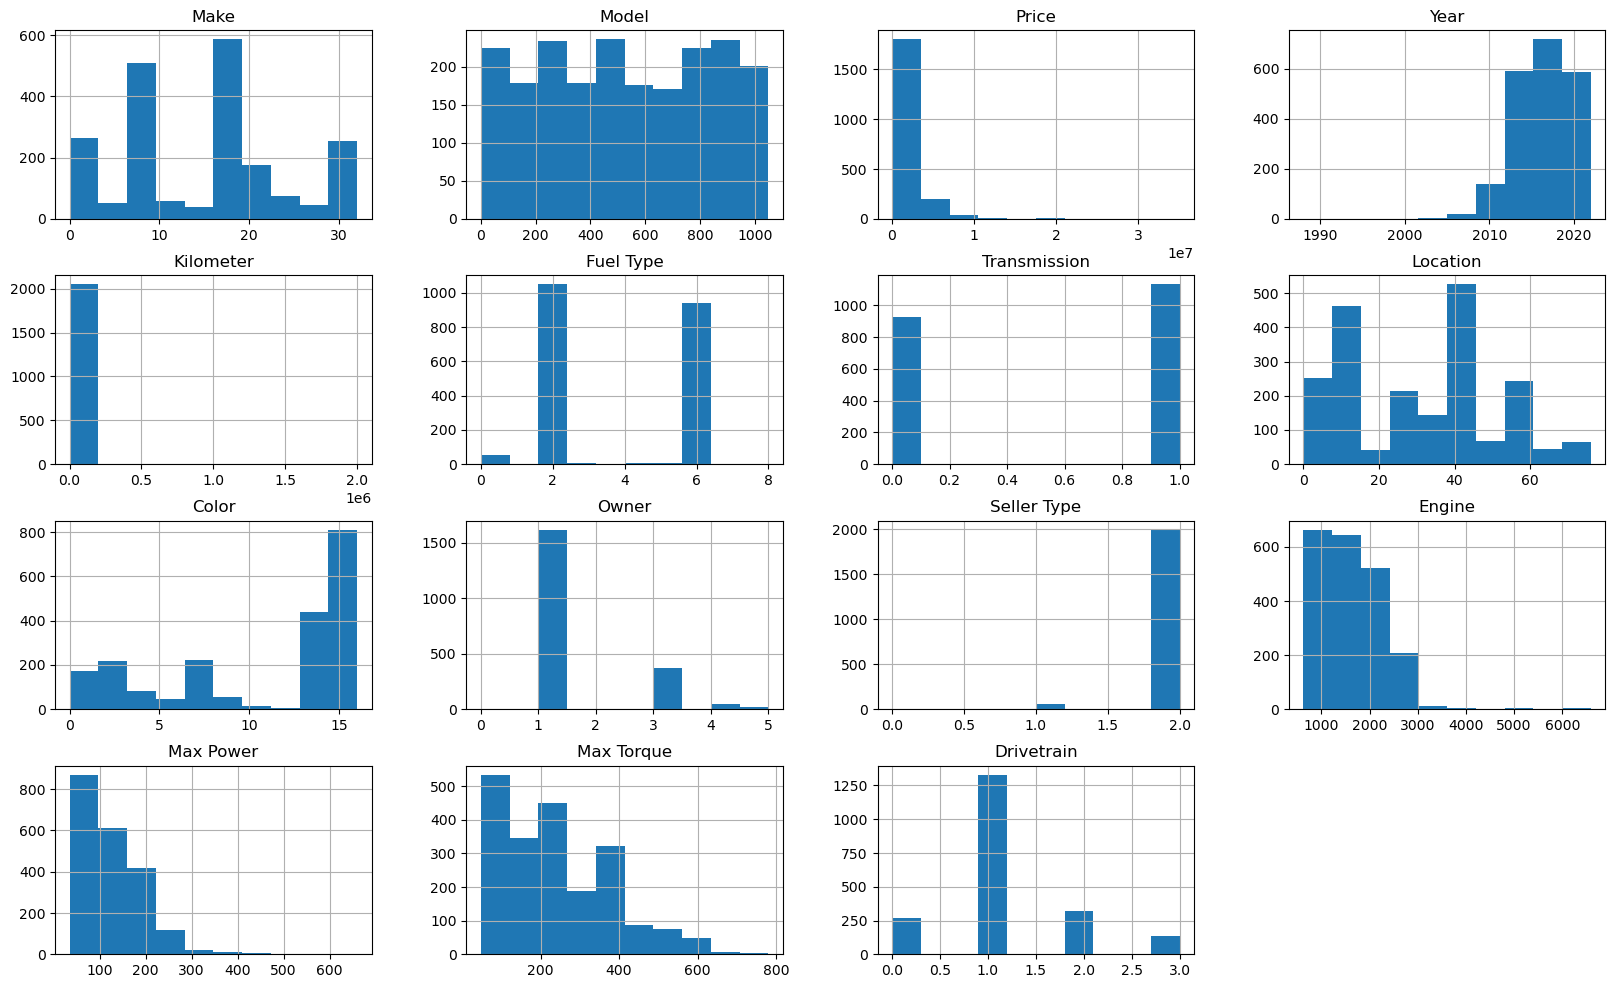

In [28]:
df.hist(figsize=(20,12))
plt.show()

In [29]:
for i in df.columns:
    print(i,':',df[i].nunique())

Make : 33
Model : 1050
Price : 619
Year : 22
Kilometer : 847
Fuel Type : 9
Transmission : 2
Location : 77
Color : 17
Owner : 6
Seller Type : 3
Engine : 108
Max Power : 166
Max Torque : 141
Drivetrain : 4


In [30]:
price_list=df['Price'].value_counts().head(10)

In [31]:
price_list

Price
425000    26
625000    24
650000    22
450000    20
375000    20
675000    19
550000    19
250000    19
325000    18
725000    16
Name: count, dtype: int64

<Axes: xlabel='Price'>

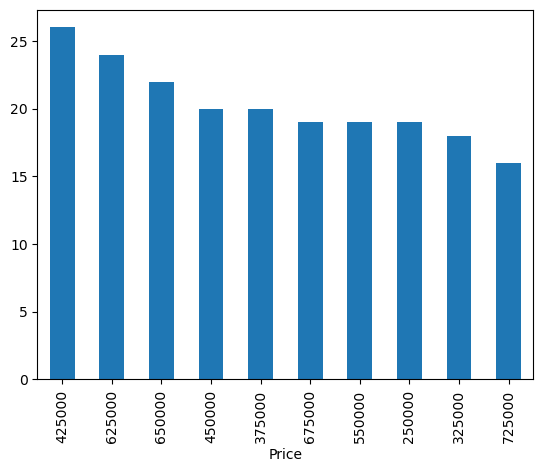

In [32]:
price_list.plot(kind='bar')

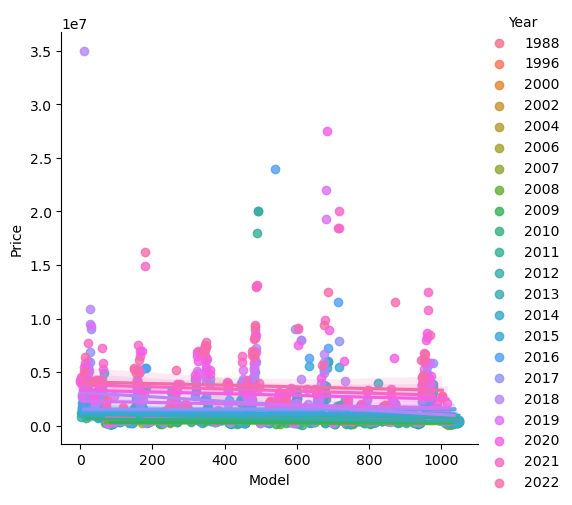

In [33]:
# Show the results of a linear regression 
sns.lmplot(x="Model", y="Price",data=df,hue='Year')
plt.show()

In [34]:
df.corr()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
Make,1.000000,0.164767,-0.038195,0.028599,0.047267,0.002192,0.135597,0.039270,0.039078,0.009231,-0.041505,0.014157,-0.124519,-0.089926,0.120103
Model,0.164767,1.000000,-0.078589,-0.033830,0.026484,-0.070626,0.196394,-0.013518,0.031841,-0.004555,-0.023933,-0.015624,-0.086054,-0.031917,-0.094696
Price,-0.038195,-0.078589,1.000000,0.311400,-0.150825,-0.128157,-0.476843,-0.115359,-0.128890,0.029360,-0.070351,0.608255,0.773288,0.666652,-0.123200
Year,0.028599,-0.033830,0.311400,1.000000,-0.296547,-0.012958,-0.171883,-0.076476,-0.060233,-0.282341,-0.037500,0.021308,0.127461,0.109828,-0.242425
Kilometer,0.047267,0.026484,-0.150825,-0.296547,1.000000,-0.180255,0.104907,0.034490,0.061958,0.090439,0.025995,0.058900,-0.033671,0.039265,0.043920
Fuel Type,0.002192,-0.070626,-0.128157,-0.012958,-0.180255,1.000000,0.086167,0.055145,-0.030753,-0.055889,-0.019066,-0.331899,-0.182842,-0.509831,0.022802
Transmission,0.135597,0.196394,-0.476843,-0.171883,0.104907,0.086167,1.000000,0.088292,0.146507,-0.063446,0.065903,-0.461589,-0.586116,-0.561889,0.090517
Location,0.039270,-0.013518,-0.115359,-0.076476,0.034490,0.055145,0.088292,1.000000,0.020000,-0.022602,-0.076587,-0.069580,-0.114519,-0.114792,0.056995
Color,0.039078,0.031841,-0.128890,-0.060233,0.061958,-0.030753,0.146507,0.020000,1.000000,0.000403,0.012812,-0.108182,-0.153797,-0.114372,0.043412
Owner,0.009231,-0.004555,0.029360,-0.282341,0.090439,-0.055889,-0.063446,-0.022602,0.000403,1.000000,0.058277,0.127416,0.086623,0.097067,0.087122


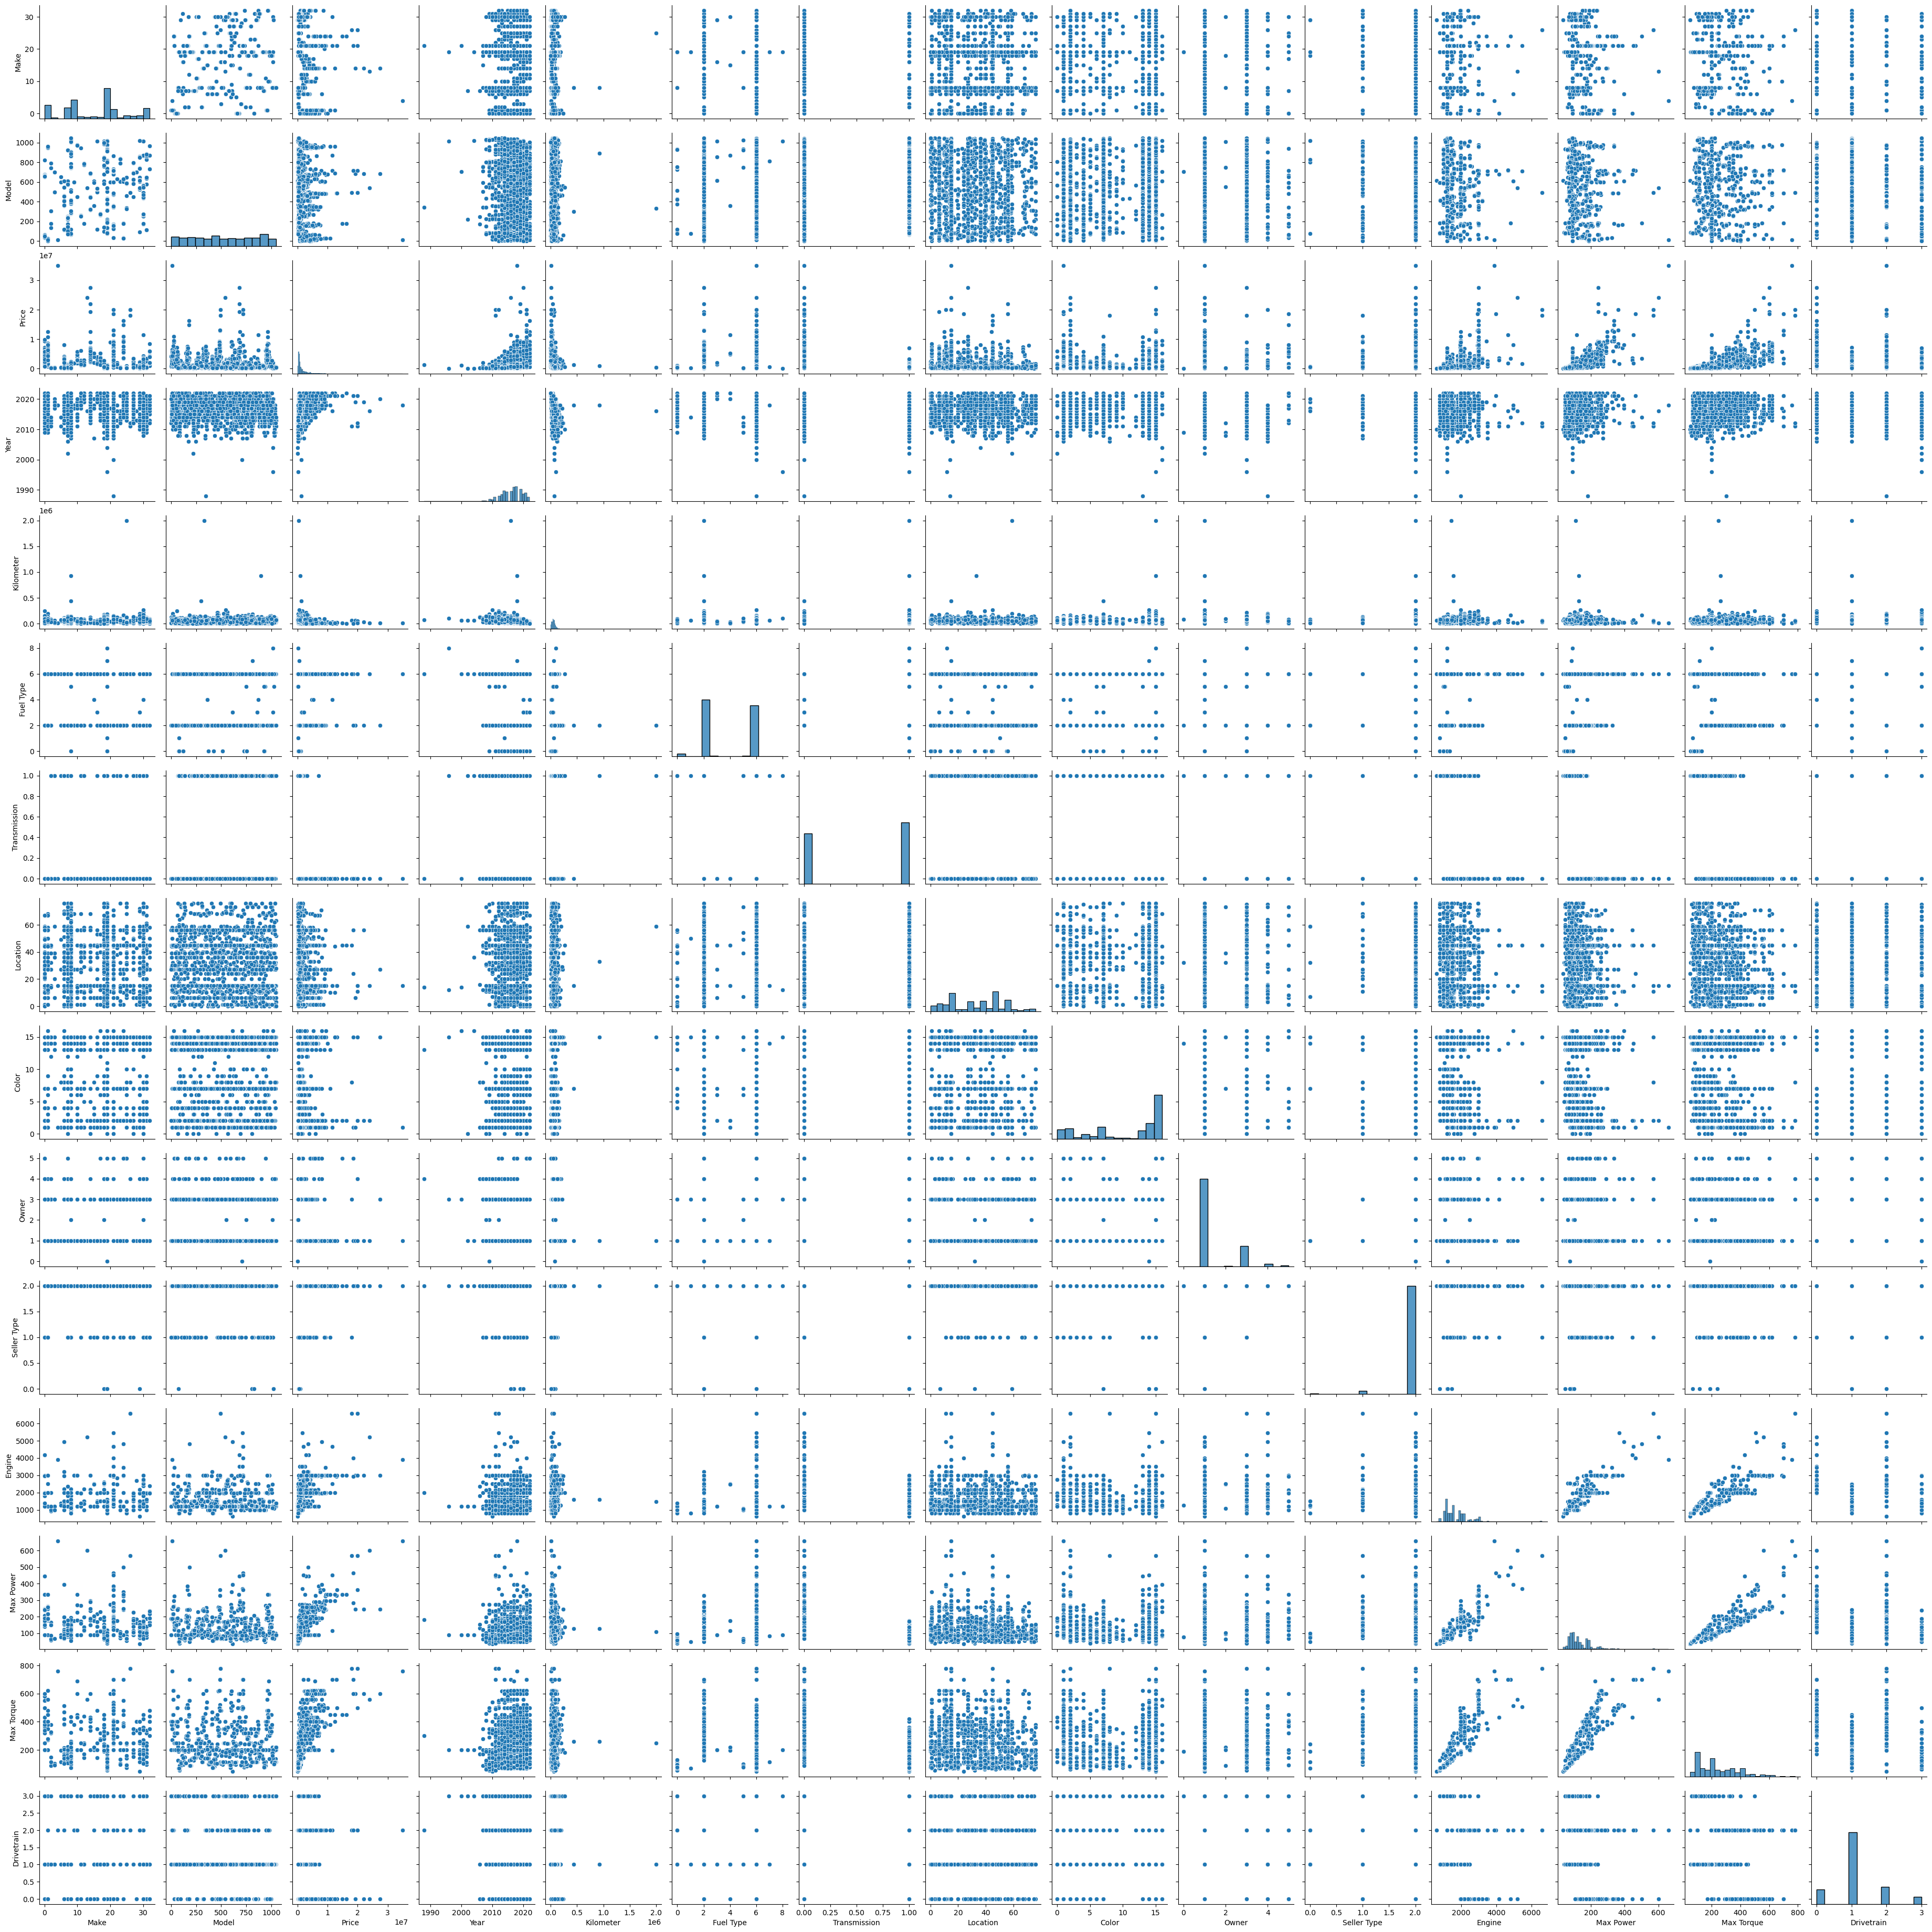

In [35]:
sns.pairplot(df)

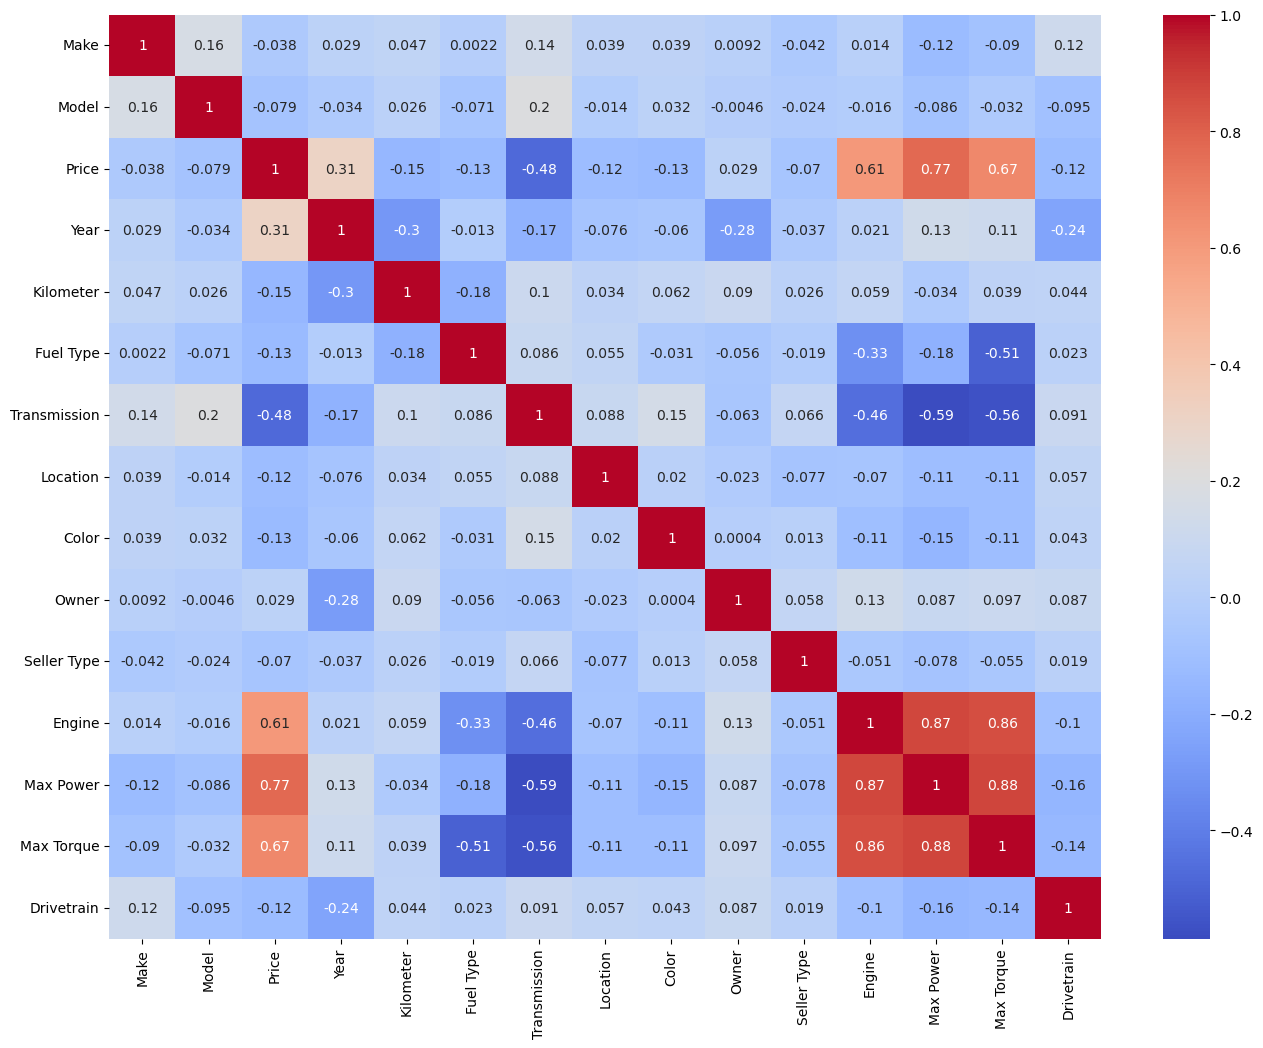

In [97]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [37]:
##Outlier Detection and Removal

In [98]:
df1=df.select_dtypes(exclude=['object'])

In [99]:
df1

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
0,7,106,505000,2017,87150,6,1,56,7,1,1,1198.0,87.0,109.0000,1
1,19,802,450000,2014,75000,2,1,40,15,3,2,1248.0,74.0,190.0000,1
2,8,1030,220000,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1
3,30,492,799000,2019,37500,6,1,41,13,1,2,1197.0,82.0,113.0000,1
4,30,548,1950000,2018,69000,2,1,45,7,1,2,2393.0,148.0,343.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,999,850000,2016,90300,2,1,67,15,1,2,2179.0,138.0,330.0000,1
2055,8,414,275000,2014,83000,6,1,1,15,3,2,814.0,55.0,75.0000,1
2056,6,455,240000,2013,73000,6,1,68,14,1,2,1196.0,70.0,102.0000,1
2057,1,13,4290000,2018,60474,2,0,12,15,1,2,1995.0,188.0,400.0000,2


In [100]:
q1=df1.quantile(0.25)
q1

Make                 8.0
Model              256.5
Price           484999.0
Year              2014.0
Kilometer        29000.0
Fuel Type            2.0
Transmission         0.0
Location            15.0
Color                6.0
Owner                1.0
Seller Type          2.0
Engine            1197.0
Max Power           83.0
Max Torque         115.0
Drivetrain           1.0
Name: 0.25, dtype: float64

In [101]:
q3=df1.quantile(0.75)
q3

Make                 21.0
Model               809.5
Price           1925000.0
Year               2019.0
Kilometer         72000.0
Fuel Type             6.0
Transmission          1.0
Location             45.0
Color                15.0
Owner                 1.0
Seller Type           2.0
Engine             1995.0
Max Power           169.0
Max Torque          343.0
Drivetrain            1.0
Name: 0.75, dtype: float64

In [102]:
IQR=q3-q1

In [103]:
C=((df1<q1-1.5*IQR)|(df1>q1+1.5*IQR)) 

In [104]:
df2=df[~C.any(axis=1)]

In [105]:
df2

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
2,8,1030,220000,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1
5,19,216,675000,2017,73315,6,1,56,7,1,2,1373.0,91.0,130.0000,1
8,27,624,1390000,2017,56000,6,0,45,15,1,2,1798.0,177.0,250.0000,1
9,23,834,575000,2015,85000,2,1,45,15,1,2,1461.0,84.0,200.0000,1
10,8,397,591000,2017,20281,6,1,45,13,1,2,1197.0,82.0,115.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2,743,299000,2014,32000,6,1,14,14,1,2,1199.0,85.0,113.0000,1
2046,19,917,850000,2018,85000,2,1,27,8,1,2,1248.0,89.0,200.0000,1
2047,7,233,480000,2015,49000,6,1,36,7,1,2,1497.0,117.0,145.0000,1
2050,8,303,891000,2016,47000,6,1,15,15,1,2,1591.0,122.0,154.0000,1


In [106]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
0,7,106,505000,2017,87150,6,1,56,7,1,1,1198.0,87.0,109.0000,1
1,19,802,450000,2014,75000,2,1,40,15,3,2,1248.0,74.0,190.0000,1
2,8,1030,220000,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1
3,30,492,799000,2019,37500,6,1,41,13,1,2,1197.0,82.0,113.0000,1
4,30,548,1950000,2018,69000,2,1,45,7,1,2,2393.0,148.0,343.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,999,850000,2016,90300,2,1,67,15,1,2,2179.0,138.0,330.0000,1
2055,8,414,275000,2014,83000,6,1,1,15,3,2,814.0,55.0,75.0000,1
2056,6,455,240000,2013,73000,6,1,68,14,1,2,1196.0,70.0,102.0000,1
2057,1,13,4290000,2018,60474,2,0,12,15,1,2,1995.0,188.0,400.0000,2


In [107]:
df1

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
0,7,106,505000,2017,87150,6,1,56,7,1,1,1198.0,87.0,109.0000,1
1,19,802,450000,2014,75000,2,1,40,15,3,2,1248.0,74.0,190.0000,1
2,8,1030,220000,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1
3,30,492,799000,2019,37500,6,1,41,13,1,2,1197.0,82.0,113.0000,1
4,30,548,1950000,2018,69000,2,1,45,7,1,2,2393.0,148.0,343.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,999,850000,2016,90300,2,1,67,15,1,2,2179.0,138.0,330.0000,1
2055,8,414,275000,2014,83000,6,1,1,15,3,2,814.0,55.0,75.0000,1
2056,6,455,240000,2013,73000,6,1,68,14,1,2,1196.0,70.0,102.0000,1
2057,1,13,4290000,2018,60474,2,0,12,15,1,2,1995.0,188.0,400.0000,2


(array([153., 250., 194.,  86.,  38.,  33.,  30.,  12.,   5.,   8.]),
 array([ 145000.,  390500.,  636000.,  881500., 1127000., 1372500.,
        1618000., 1863500., 2109000., 2354500., 2600000.]),
 <BarContainer object of 10 artists>)

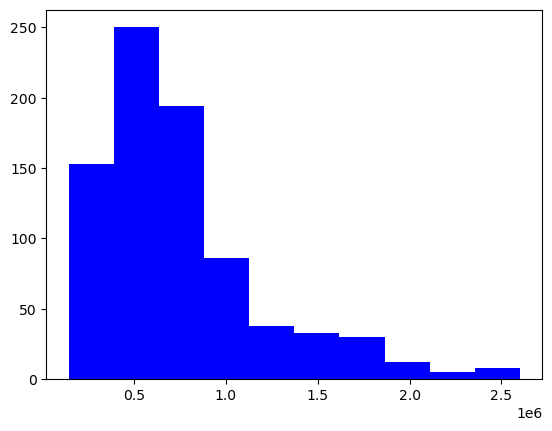

In [108]:
plt.hist(df2['Price'],bins=10,color='blue')

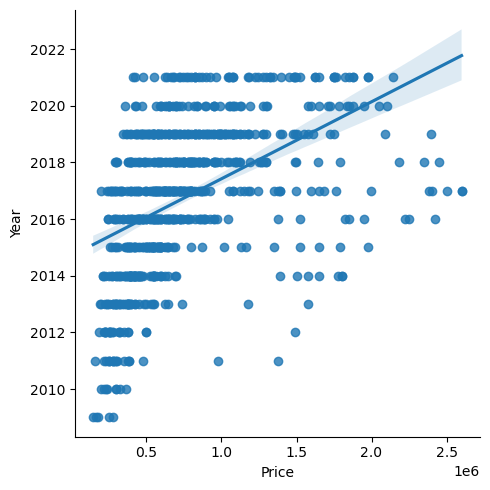

In [109]:
sns.lmplot(x='Price',y='Year',data=df2)

In [110]:
##To check any Missing values after perform the Measure of tendency

In [111]:
df2.isnull().sum()

Make            0
Model           0
Price           0
Year            0
Kilometer       0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
Engine          0
Max Power       0
Max Torque      0
Drivetrain      0
dtype: int64

In [112]:
##To split the data as X and Y X=Independent variables,y=dependent variables

In [113]:
x=df2.drop(columns=['Price'])
x

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
2,8,1030,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1
5,19,216,2017,73315,6,1,56,7,1,2,1373.0,91.0,130.0000,1
8,27,624,2017,56000,6,0,45,15,1,2,1798.0,177.0,250.0000,1
9,23,834,2015,85000,2,1,45,15,1,2,1461.0,84.0,200.0000,1
10,8,397,2017,20281,6,1,45,13,1,2,1197.0,82.0,115.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2,743,2014,32000,6,1,14,14,1,2,1199.0,85.0,113.0000,1
2046,19,917,2018,85000,2,1,27,8,1,2,1248.0,89.0,200.0000,1
2047,7,233,2015,49000,6,1,36,7,1,2,1497.0,117.0,145.0000,1
2050,8,303,2016,47000,6,1,15,15,1,2,1591.0,122.0,154.0000,1


In [114]:
y=df2['Price']
y

2        220000
5        675000
8       1390000
9        575000
10       591000
         ...   
2042     299000
2046     850000
2047     480000
2050     891000
2051     925000
Name: Price, Length: 809, dtype: int64

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(      Make  Model  Year  Kilometer  Fuel Type  Transmission  Location  Color  \
 1998    19    198  2017      55000          6             0        51     15   
 1640     3    499  2019      60969          6             1        59     14   
 1193     8    295  2020       7000          2             1         1     15   
 887     19    184  2014      49580          6             1        12     15   
 761     25    589  2018      14000          6             1        45      6   
 ...    ...    ...   ...        ...        ...           ...       ...    ...   
 149     18    606  2019      17000          2             1        39      6   
 242     19    212  2015      38000          6             1        45      5   
 700     19    312  2018      68818          6             0        45     14   
 1183     8    288  2018      34841          6             1        27     15   
 227     19    819  2013      26000          2             1        15     15   
 
       Owner  Seller Type 

In [116]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((647, 14), (162, 14), (647,), (162,))

In [117]:
##Regression Algorthms

In [118]:
linearreg=LinearRegression()
linearreg

LinearRegression()

In [119]:
linearreg.fit(x_train,y_train)

LinearRegression()

In [120]:
pred=linearreg.predict(x_test)
pred

array([1359200.54576904,  533887.83625601, 1903789.58191575,
        820635.52580138,  145946.81597787, 1676335.1884944 ,
       1370963.89348638,  414021.99723341,  433351.01508658,
        768529.22725086, 1188698.60438429,  494941.73724802,
        878835.48754738,  711679.42495288,  400864.92872241,
        894689.73299839,  994505.00310233,  517809.6196821 ,
        306873.47290306,  274215.28011625,  716936.78752849,
        412213.76376393,  808895.30662812, 1430934.30909237,
       1113929.31903453,  495356.1612038 , 1101077.2210156 ,
         88894.23270009,  739875.47137508,  137769.22433345,
        855459.19072337, 1128477.55324821,  320601.16600098,
        862638.35193338,  833673.26826267,  840913.58422782,
        598941.78996702, 1582189.63847502, 1275960.04306434,
        692999.94074343,  959226.72215989,  297299.59320712,
       1282362.95842086, 1175102.36826566,  689669.10985398,
       1258064.12197039,  734394.39811902, 1855229.71984884,
       1348054.41885813,

In [121]:
MSE=mean_squared_error(y_test,pred)
MSE

38359911771.41415

In [122]:
perf=r2_score(y_test,pred)
perf

0.8312597057058213

In [123]:
##Ridge Regressor 

In [124]:
ridge=Ridge()
ridge

Ridge()

In [125]:
ridge.fit(x_train,y_train)

Ridge()

In [126]:
pred=ridge.predict(x_test)
pred

array([1358043.88459371,  534067.31066281, 1903440.4911658 ,
        820929.24073309,  146179.51136214, 1675285.95086394,
       1370029.53599569,  414429.98518254,  433538.47686195,
        768983.10269462, 1187624.31723657,  495303.8262873 ,
        879059.07300492,  711697.43133533,  401005.99492393,
        895458.95555584,  993517.7908248 ,  518257.24355677,
        307190.8809396 ,  274432.95531492,  716996.5031154 ,
        412447.25776051,  809379.81699128, 1431911.10373221,
       1114410.54209518,  495880.06017888, 1101736.95557357,
         89089.89317571,  739851.21652874,  137887.8051405 ,
        853993.89386581, 1129633.0622137 ,  318812.23440726,
        860899.87122327,  834348.6280297 ,  842034.62046127,
        599195.93022975, 1581560.57020292, 1275097.07415292,
        693367.76256442,  960013.92714441,  297461.15617497,
       1283224.78760441, 1175643.38859165,  687850.42961529,
       1257034.897681  ,  734484.59330204, 1854892.95001583,
       1347251.18406282,

In [127]:
MSE=mean_squared_error(y_test,pred)
MSE

38377039270.111595

In [128]:
perf=r2_score(y_test,pred)
perf

0.8311843640525883

In [129]:
#with the use of autohyperparameter tuner

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
autohp=Ridge()

In [180]:
parameter={'alpha':[0.1, 1, 10, 100]}

In [181]:
Ridgehp=GridSearchCV(autohp,parameter,scoring='neg_mean_squared_error',cv=5)

In [182]:
Ridgehp.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [183]:
print(Ridgehp.best_params_)

{'alpha': 1}


In [184]:
print(Ridgehp.best_score_)

-38141802822.46461


In [185]:
##Lasso Regressor

In [186]:
las=Lasso()

In [187]:
las.fit(x_train,y_train)

Lasso()

In [188]:
y_prediction=las.predict(x_test)
y_prediction

array([1359195.89384285,  533889.38223389, 1903788.44291387,
        820636.16110019,  145948.69542985, 1676331.83068052,
       1370961.06571271,  414023.703242  ,  433352.77792332,
        768530.26502462, 1188694.59460266,  494943.41045566,
        878836.25800684,  711678.73611955,  400865.45887747,
        894692.15000255,  994501.13545589,  517811.86113787,
        306875.14478661,  274216.61243787,  716936.41464415,
        412215.49768382,  808897.52699664, 1430936.83651271,
       1113931.22597986,  495358.70023324, 1101079.22805974,
         88895.65714465,  739874.84875485,  137770.40192123,
        855453.7953292 , 1128481.39091596,  320595.21621388,
        862631.65741229,  833675.72246462,  840917.39089251,
        598943.11637768, 1582187.28629975, 1275956.73404956,
        693001.95308702,  959229.3712032 ,  297300.7853615 ,
       1282365.82855593, 1175104.80946887,  689663.51026314,
       1258060.10332112,  734394.23160866, 1855228.65113881,
       1348051.45343721,

In [189]:
MSE=mean_squared_error(y_test,y_prediction)
MSE

38359968392.71922

In [190]:
performance=r2_score(y_test,y_prediction)
performance

0.831259456636018

In [191]:
##With hyperparamter Tunning

In [192]:
laso=Lasso()

In [193]:
##With Hyper Parameter Tunnig

In [194]:
parameter={'alpha':[1e-12,1e-13,1e-5,1e-9,1e-10,1e-15,1e-2,1e-19]}

In [195]:
lasohp=GridSearchCV(laso,parameter,scoring='neg_mean_squared_error',cv=5)

In [196]:
lasohp.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.241e+12, tolerance: 9.740e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+13, tolerance: 1.056e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.794e+12, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-12, 1e-13, 1e-05, 1e-09, 1e-10, 1e-15,
                                   0.01, 1e-19]},
             scoring='neg_mean_squared_error')

In [197]:
print(lasohp.best_params_)

{'alpha': 0.01}


In [198]:
print(lasohp.best_score_)

-38149974124.97423


In [199]:
predictionhp=lasohp.predict(x_test)
predictionhp

array([1359200.49924976,  533887.85171577, 1903789.57052577,
        820635.53215438,  145946.83477242, 1676335.1549162 ,
       1370963.86520872,  414022.01429351,  433351.03271489,
        768529.23762859, 1188698.56428647,  494941.7539801 ,
        878835.49525192,  711679.4180645 ,  400864.93402398,
        894689.75716843,  994504.96442586,  517809.64209668,
        306873.48962191,  274215.29343946,  716936.78379962,
        412213.7811031 ,  808895.32883181, 1430934.33436662,
       1113929.33810395,  495356.18659407, 1101077.24108605,
         88894.24694455,  739875.46514885,  137769.23610933,
        855459.13676943, 1128477.59162503,  320601.10650308,
        862638.28498811,  833673.29280466,  840913.6222946 ,
        598941.80323112, 1582189.61495334, 1275960.00997433,
        692999.96086685,  959226.74865028,  297299.60512866,
       1282362.98712224, 1175102.39267759,  689669.05385806,
       1258064.08178401,  734394.3964539 , 1855229.70916179,
       1348054.38920391,

In [200]:
MSE=mean_squared_error(y_test,predictionhp)
MSE

38359912337.533775

In [201]:
performance=r2_score(y_test,predictionhp)
performance

0.8312597032155342

In [202]:
##DecisionTree Regressor

In [203]:
# Initializing and training DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [204]:
y_pred=DT_regressor.predict(x_test)

In [205]:
MSE=mean_squared_error(y_test,y_pred)
MSE

48223228407.512344

In [206]:
perf=r2_score(y_test,y_pred)
perf

0.7878722505466531

In [207]:
### with hyperparameter tuning

In [208]:
# Define hyperparameter tuning space
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [209]:
# Initializing GridSearchCV with DecisionTreeRegressor
gs = GridSearchCV(DT_regressor, params, cv=5, scoring='neg_mean_squared_error')

In [210]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [211]:
# Evaluate best-performing model on testing data
best_model = gs.best_estimator_
y_pre = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pre)
mae = mean_absolute_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

NameError: name 'mean_absolute_error' is not defined

In [212]:
##Support Vector Regressor

In [213]:
from sklearn.svm import SVR

# SVR without tuning
svr_model = SVR()
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)

In [214]:
from sklearn.metrics import r2_score

# Evaluate SVR
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR R2: {r2_svr}")
print(f"SVR MSE: {mse_svr}")

SVR R2: -0.18066232842573693
SVR MSE: 268401231251.17792


In [215]:
# SVR with tuning
param_grid_svr = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01]}
svr_cv = GridSearchCV(SVR(), param_grid_svr, cv=5)
svr_cv.fit(x_train, y_train)
y_pred_svr_tuned = svr_cv.predict(x_test)

In [216]:
# Evaluate tuned SVR
r2_svr_tuned = r2_score(y_test, y_pred_svr_tuned)
mse_svr_tuned = mean_squared_error(y_test, y_pred_svr_tuned)
print(f"Tuned SVR R2: {r2_svr_tuned}")
print(f"Tuned SVR MSE: {mse_svr_tuned}")

Tuned SVR R2: -0.18081754178936804
Tuned SVR MSE: 268436516071.31842


In [217]:
##Random Forest Regressor

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [220]:
##Defining RandomForest Regressor Model
RFG=RandomForestRegressor()
RFG

RandomForestRegressor()

In [221]:
RFG.fit(x_train, y_train)

RandomForestRegressor()

In [222]:
y_pred = RFG.predict(x_test)

mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Without Hyperparameter Tuning:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Without Hyperparameter Tuning:
Mean Squared Error: 22863657345.2094
R-squared: 0.8994257262096496


In [223]:
#WITH HYPER PARAMETER TUNNING

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
#Defining the Hyper parameter grid for tunning
param={
    'n_estimators':[50,100,200],
    'max_features':['auto','sqrt'],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [242]:
grid_search =GridSearchCV(estimator=RFG,param_grid=param , cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=2)

In [243]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [244]:
#Extracting the best parameters and best estimator
best_params=grid_search.best_params_
print(best_params)
best_RFG=grid_search.best_estimator_
print(best_RFG)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)


In [245]:
#making predictions on the test Set
y_pred=best_RFG.predict(x_test_scaled)
y_pred

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([734774.96, 612534.95, 734774.96, 617659.95, 612534.95, 739899.96,
       734774.96, 617659.95, 612534.95, 501019.95, 734774.96, 612534.95,
       612534.95, 617659.95, 501019.95, 612534.95, 734774.96, 612534.95,
       617659.95, 617659.95, 617659.95, 612534.95, 612534.95, 612534.95,
       612534.95, 617659.95, 612534.95, 617659.95, 617659.95, 617659.95,
       739899.96, 612534.95, 739899.96, 739899.96, 617659.95, 612534.95,
       612534.95, 734774.96, 734774.96, 612534.95, 501019.95, 617659.95,
       612534.95, 617659.95, 734774.96, 734774.96, 617659.95, 734774.96,
       734774.96, 501019.95, 617659.95, 739899.96, 612534.95, 734774.96,
       617659.95, 739899.96, 617659.95, 612534.95, 733424.96, 612534.95,
       739899.96, 617659.95, 617659.95, 617659.95, 612534.95, 501019.95,
       617659.95, 617659.95, 617659.95, 612534.95, 612534.95, 617659.95,
       739899.96, 612534.95, 625169.96, 734774.96, 734774.96, 612534.95,
       734774.96, 617659.95, 617659.95, 594259.96, 

In [248]:
#making predictions on the test Set
y_pred=best_RFG.predict(x_test_scaled)
y_pred

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([734774.96, 612534.95, 734774.96, 617659.95, 612534.95, 739899.96,
       734774.96, 617659.95, 612534.95, 501019.95, 734774.96, 612534.95,
       612534.95, 617659.95, 501019.95, 612534.95, 734774.96, 612534.95,
       617659.95, 617659.95, 617659.95, 612534.95, 612534.95, 612534.95,
       612534.95, 617659.95, 612534.95, 617659.95, 617659.95, 617659.95,
       739899.96, 612534.95, 739899.96, 739899.96, 617659.95, 612534.95,
       612534.95, 734774.96, 734774.96, 612534.95, 501019.95, 617659.95,
       612534.95, 617659.95, 734774.96, 734774.96, 617659.95, 734774.96,
       734774.96, 501019.95, 617659.95, 739899.96, 612534.95, 734774.96,
       617659.95, 739899.96, 617659.95, 612534.95, 733424.96, 612534.95,
       739899.96, 617659.95, 617659.95, 617659.95, 612534.95, 501019.95,
       617659.95, 617659.95, 617659.95, 612534.95, 612534.95, 617659.95,
       739899.96, 612534.95, 625169.96, 734774.96, 734774.96, 612534.95,
       734774.96, 617659.95, 617659.95, 594259.96, 

In [247]:
mse=mean_squared_error(y_test,y_pred)
mse

243045598863.7961

In [ ]:
per=r2_score(y_test,y_pred)
per

In [249]:
joblib.dump(RFG,'C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/Milestone3_regressor.pkl')

['C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/Milestone3_regressor.pkl']

In [250]:
Load_model=joblib.load('C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/Milestone3_regressor.pkl')
Load_model

RandomForestRegressor()

In [251]:
##Conclusion

In [253]:
#The Random Forest Regressor outperforms other models in predicting the car dataset, achieving a remarkable accuracy of 89%. 